- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex
- Age	Age in years
- sibsp	# of siblings / spouses aboard the Titanic
- parch	# of parents / children aboard the Titanic
- ticket	Ticket number
- fare	Passenger fare
- cabin	Cabin number
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# 1- Data Gathering

##### Importing Packages

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [56]:
df =pd.read_csv('Titanic.csv')

# 2- Data Quality Assessment

In [57]:
df.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [58]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Cabin        204 non-null    object 

 11  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


In [62]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
df.duplicated().sum()

0

<Axes: >

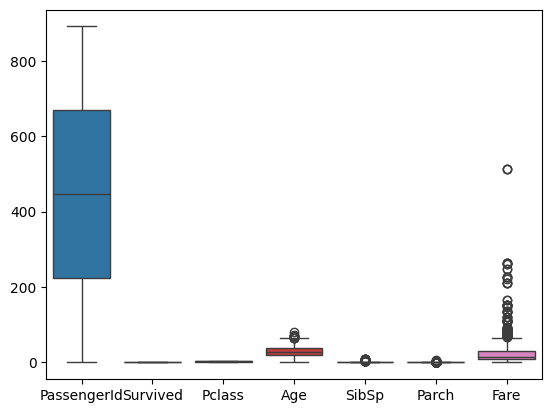

In [64]:
sns.boxplot(df)

In [65]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
categorical_col = [col for col in df.columns if df[col].dtype == 'object']

In [66]:
numeric_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [67]:
categorical_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

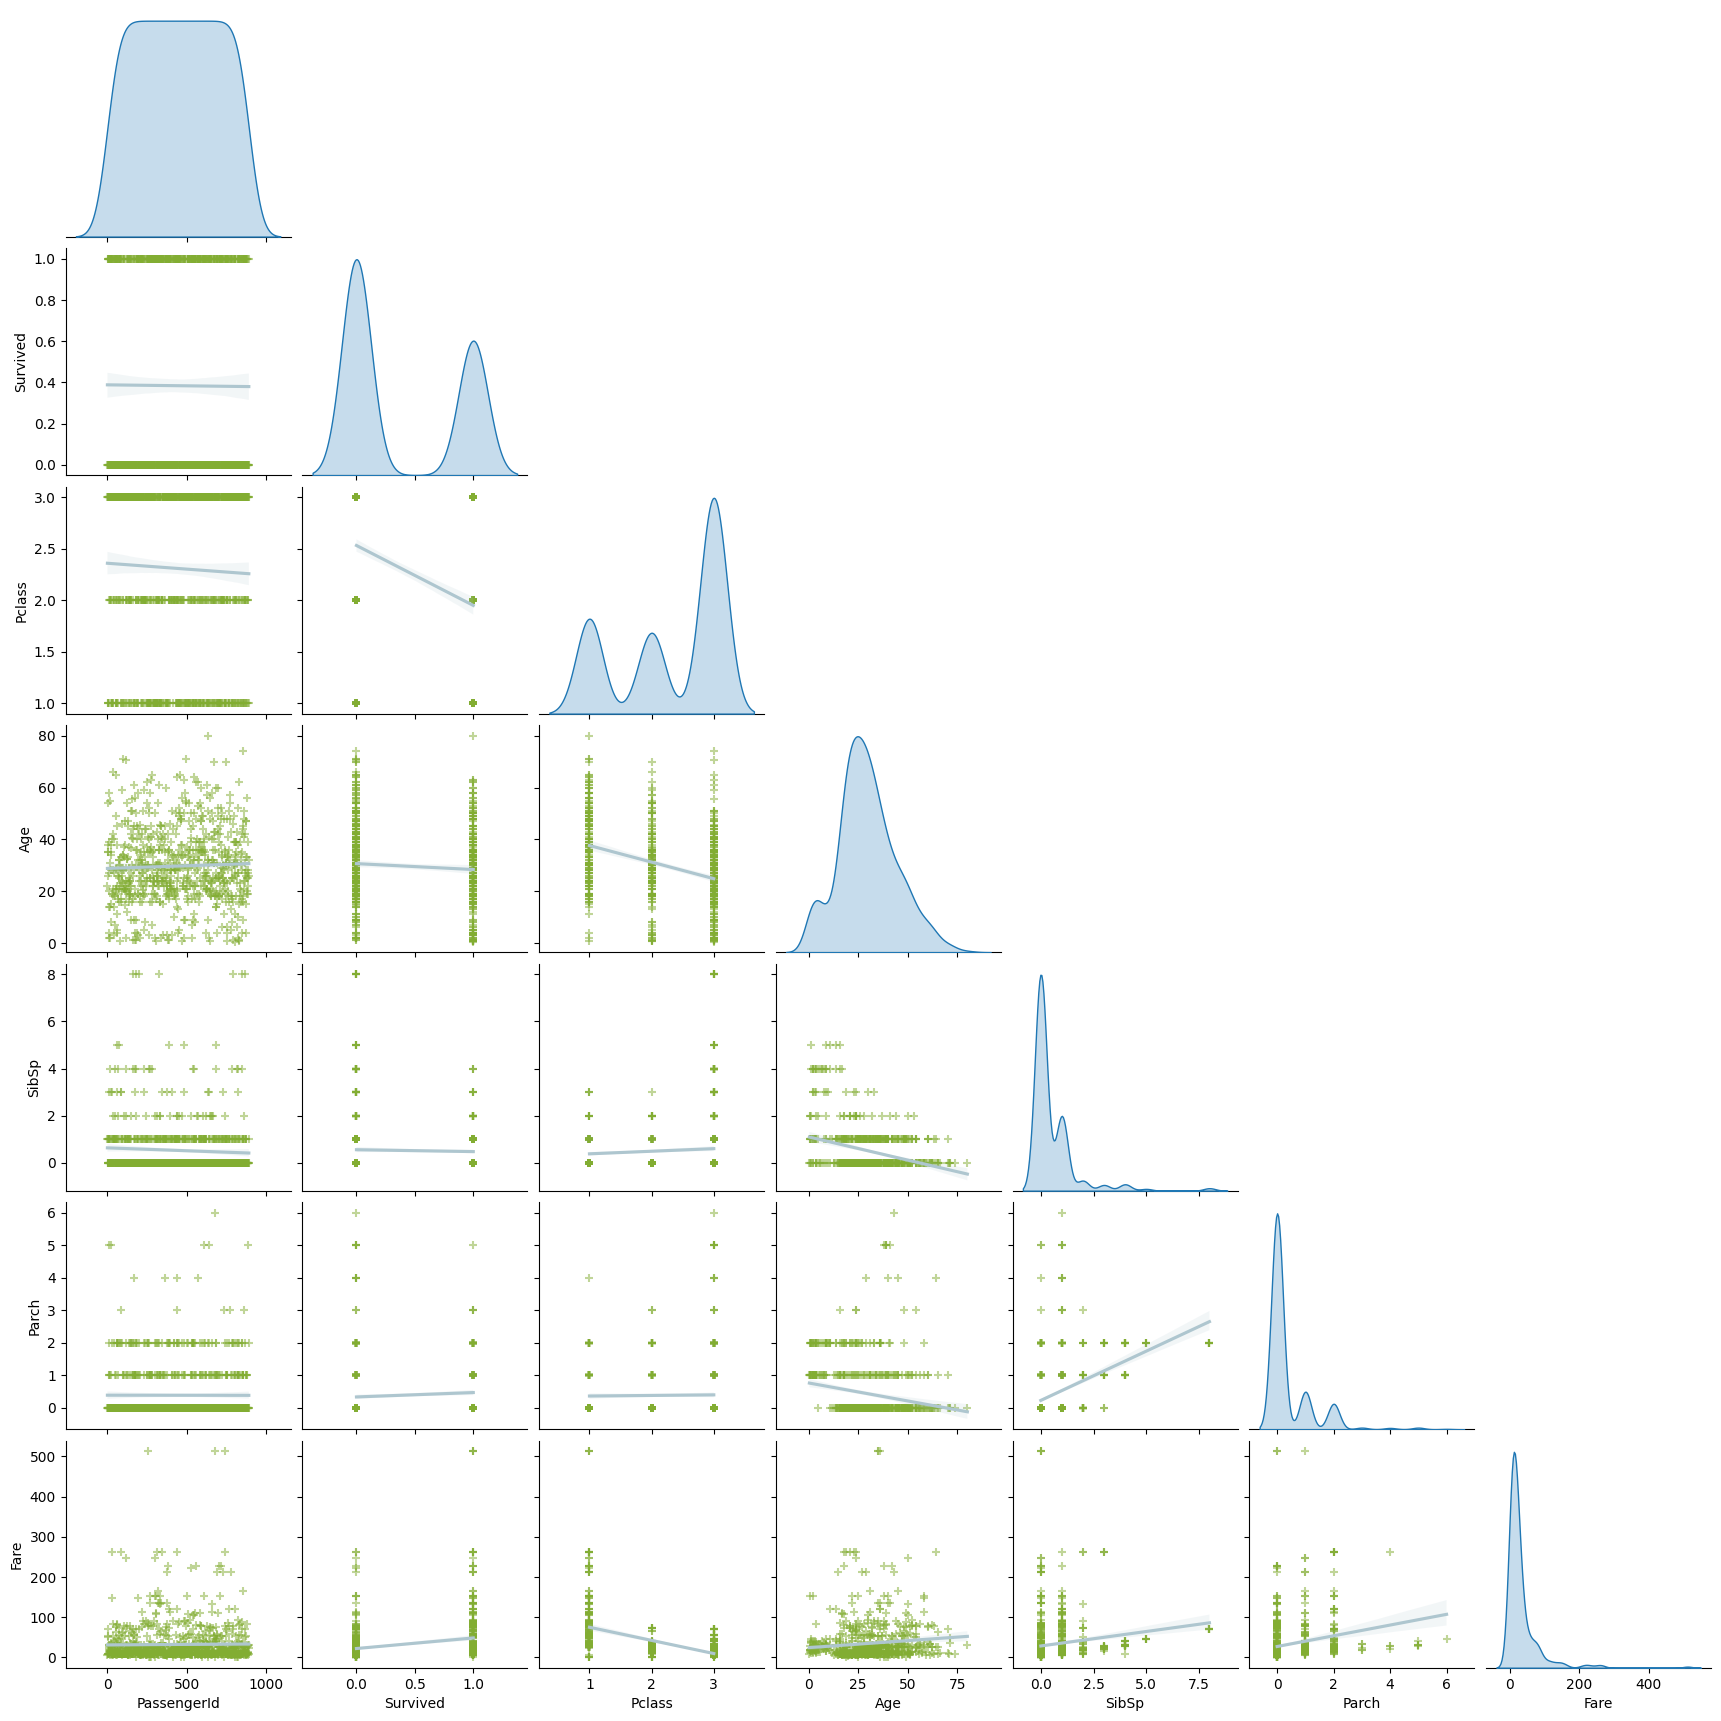

In [68]:
sns.pairplot(df[numeric_col],
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
                 corner=True);

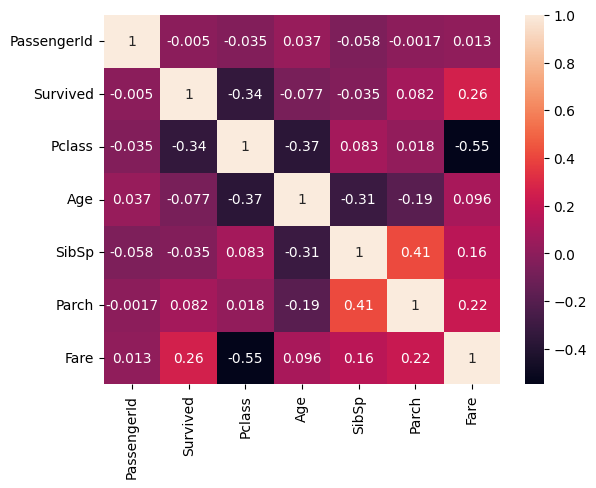

In [69]:
corr_matrix = df[numeric_col].corr()

# plot the heatmap
sns.heatmap(corr_matrix, annot=True)

# show the plot
plt.show()

In [70]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [71]:
df.duplicated().any()

False

<Axes: xlabel='Survived', ylabel='count'>

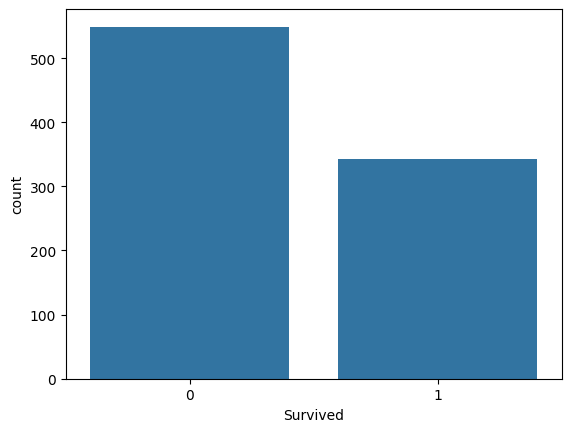

In [83]:
sns.countplot(x='Survived',data=df)

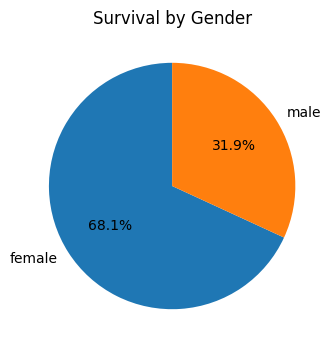

In [94]:
survived = df[df['Survived'] == 1]
survival_by_gender = survived.groupby('Sex').size()


fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(survival_by_gender, labels=survival_by_gender.index, autopct='%1.1f%%', startangle=90)

plt.title('Survival by Gender')
plt.show()


The precentage of females survived > that of males

<Axes: xlabel='Age', ylabel='Count'>

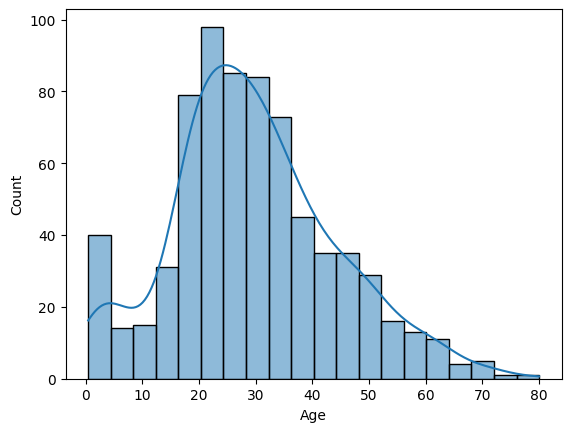

In [117]:
sns.histplot(df['Age'], kde=True)

In [120]:
agg_data = survived.groupby('Survived').agg({'Age':'mean','Fare':'mean','Pclass':lambda x: x.mode()[0],'SibSp':'mean','Parch':'mean'})
agg_data

,Age,Fare,Pclass,SibSp,Parch
Survived,,,,,
1,28.34369,48.395408,1,0.473684,0.464912


### Insisghts about the Survivals:
#### 1st class tickets holders > any other class
#### The avg of age of survivals is 28.3
#### The avg fare payed by the survivals >> the avg fare of all people


In [121]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Survivors by Number of Parents/Children Aboard')

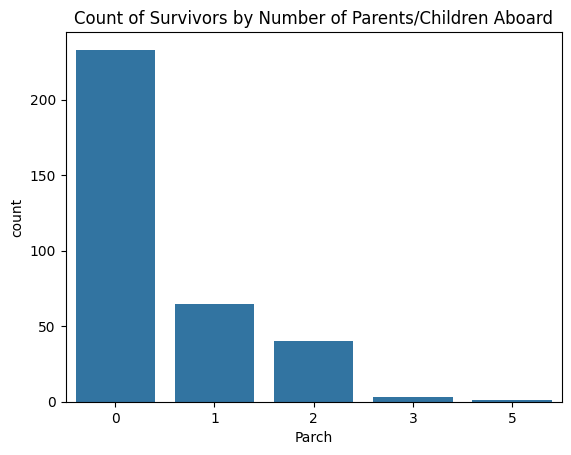

In [125]:
sns.countplot(x='Parch',data=survived)
plt.title('Count of Survivors by Number of Parents/Children Aboard')

In [122]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Survivors by Number of Siblings/Spouses Aboard')

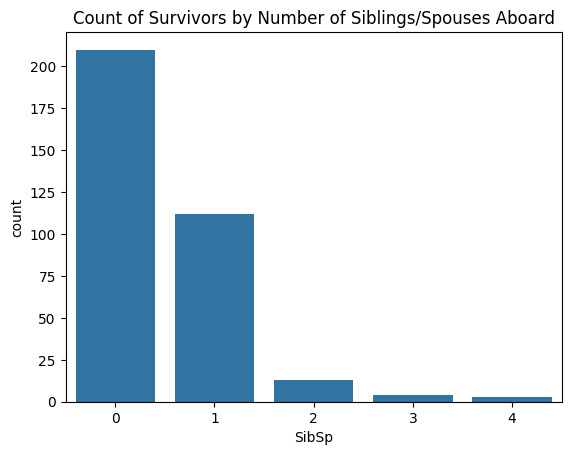

In [126]:
sns.countplot(x='SibSp',data=survived)
plt.title('Count of Survivors by Number of Siblings/Spouses Aboard')

# 3-Data Cleaning

In [96]:
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Cabin        204 non-null    object 

 11  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


In [97]:
df2.isna().sum()/len(df2)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [98]:
df2.drop('Cabin', axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 11 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(4)

memory usage: 76.7+ KB


In [99]:
df2.isna().sum()/len(df2)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [100]:
df2[['Age']].median()

Age    28.0
dtype: float64

In [101]:
age_median = df2.Age.median()
age_median

28.0

In [102]:
df2.Age.fillna(age_median, inplace=True)


In [103]:
df2.isna().sum()/len(df2)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [104]:
df2.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [105]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [106]:
df3 = df2.dropna()

In [107]:
df3.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [108]:
df2.Embarked.fillna('S', inplace=True)

In [109]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 4- Data Transformation & Reduction

In [110]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [111]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [113]:
df2['Title'] = df2['Name'].str.extract(r',\s*([A-Za-z]+)\.', expand=False)
df2['Title'].value_counts()


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: count, dtype: int64

In [115]:
def infer_marital_status(title):
    if title in ['Mrs', 'Mme']:
        return 'Married'
    elif title in ['Miss', 'Mlle']:
        return 'Unmarried'
    else:
        return 'Other/Unknown'

df2['MaritalStatus'] = df2['Title'].apply(infer_marital_status)

df2[['Name', 'Title', 'MaritalStatus']].head()


                                                Name Title  MaritalStatus

0                            Braund, Mr. Owen Harris    Mr  Other/Unknown

1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs        Married

2                             Heikkinen, Miss. Laina  Miss      Unmarried

3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs        Married

4                           Allen, Mr. William Henry    Mr  Other/Unknown


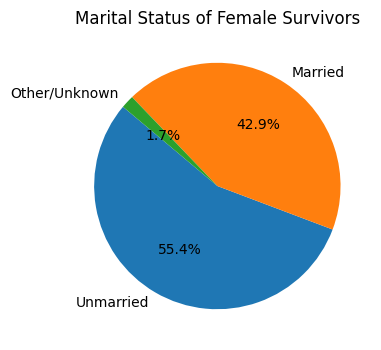

In [116]:
female_survivors = df2[(df2['Survived'] == 1) & (df2['Sex'] == 'female')]

marital_status_counts = female_survivors['MaritalStatus'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status of Female Survivors')
plt.show()

In [130]:
df_dropped = df2.drop(['PassengerId','Name', 'Ticket','Title'], axis=1)
df_dropped

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaritalStatus
0,0,3,male,22.0,1,0,7.2500,S,Other/Unknown
1,1,1,female,38.0,1,0,71.2833,C,Married
2,1,3,female,26.0,0,0,7.9250,S,Unmarried
3,1,1,female,35.0,1,0,53.1000,S,Married
4,0,3,male,35.0,0,0,8.0500,S,Other/Unknown
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other/Unknown
887,1,1,female,19.0,0,0,30.0000,S,Unmarried
888,0,3,female,28.0,1,2,23.4500,S,Unmarried
889,1,1,male,26.0,0,0,30.0000,C,Other/Unknown


In [131]:
df_transformed = pd.get_dummies(df_dropped)
df_transformed

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,MaritalStatus_Married,MaritalStatus_Other/Unknown,MaritalStatus_Unmarried
0,0,3,22.0,1,0,7.2500,False,True,False,False,True,False,True,False
1,1,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True,True,False,False
4,0,3,35.0,0,0,8.0500,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True,False,False,True,False,True,False
887,1,1,19.0,0,0,30.0000,True,False,False,False,True,False,False,True
888,0,3,28.0,1,2,23.4500,True,False,False,False,True,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,True,False,False,False,True,False


#5- Scaling

In [150]:
numeric_col = [col for col in df_transformed.select_dtypes(include='number').columns]
numeric_col

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'MaritalStatus_Married',
 'MaritalStatus_Other/Unknown',
 'MaritalStatus_Unmarried']

### 1- Std Scaling

In [141]:
df_std_scling = df_transformed.copy()
for col in numeric_col:
    mean = df_transformed[col].mean()
    std = df_transformed[col].std()
    df_std_scling[col] = (df_transformed[col] - mean) / std

df_std_scling

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,MaritalStatus_Married,MaritalStatus_Other/Unknown,MaritalStatus_Unmarried
0,-0.788829,0.826913,-0.565419,0.432550,-0.473408,-0.502163,-0.737281,0.737281,-0.481772,-0.307390,0.615493,-0.405612,0.730044,-0.509865
1,1.266279,-1.565228,0.663488,0.432550,-0.473408,0.786404,1.354813,-1.354813,2.073341,-0.307390,-1.622891,2.462644,-1.368243,-0.509865
2,1.266279,0.826913,-0.258192,-0.474279,-0.473408,-0.488580,1.354813,-1.354813,-0.481772,-0.307390,0.615493,-0.405612,-1.368243,1.959102
3,1.266279,-1.565228,0.433068,0.432550,-0.473408,0.420494,1.354813,-1.354813,-0.481772,-0.307390,0.615493,2.462644,-1.368243,-0.509865
4,-0.788829,0.826913,0.433068,-0.474279,-0.473408,-0.486064,-0.737281,0.737281,-0.481772,-0.307390,0.615493,-0.405612,0.730044,-0.509865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.788829,-0.369158,-0.181385,-0.474279,-0.473408,-0.386454,-0.737281,0.737281,-0.481772,-0.307390,0.615493,-0.405612,0.730044,-0.509865
887,1.266279,-1.565228,-0.795839,-0.474279,-0.473408,-0.044356,1.354813,-1.354813,-0.481772,-0.307390,0.615493,-0.405612,-1.368243,1.959102
888,-0.788829,0.826913,-0.104579,0.432550,2.007806,-0.176164,1.354813,-1.354813,-0.481772,-0.307390,0.615493,-0.405612,-1.368243,1.959102
889,1.266279,-1.565228,-0.258192,-0.474279,-0.473408,-0.044356,-0.737281,0.737281,2.073341,-0.307390,-1.622891,-0.405612,0.730044,-0.509865


### 2- Min-Max Scaling

In [158]:
df_min_max_scling = df_transformed.copy()

for col in numeric_col:
    if df_transformed[col].dtype == 'bool':
        df_transformed[col] = df_transformed[col].astype(int)
    min_val = df_min_max_scling[col].min()
    max_val = df_min_max_scling[col].max()
    df_min_max_scling[col] = (df_min_max_scling[col] - min_val) / (max_val - min_val)

df_min_max_scling

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,MaritalStatus_Married,MaritalStatus_Other/Unknown,MaritalStatus_Unmarried
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
888,0.0,1.0,0.346569,0.125,0.333333,0.045771,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


### 3-Robust Scaling

In [159]:
df_robut_scaling = df_transformed.copy()
for col in numeric_col:
    q1 = df_robut_scaling[col].quantile(0.25)
    q2 = df_robut_scaling[col].quantile(0.5)
    q3 = df_robut_scaling[col].quantile(0.75)
    iqr = q3 - q1
    df_robut_scaling[col] = (df_robut_scaling[col] - q2) / iqr

df_robut_scaling

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,MaritalStatus_Married,MaritalStatus_Other/Unknown,MaritalStatus_Unmarried
0,0.0,0.0,-0.461538,1.0,NaN,-0.312011,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN
1,1.0,-2.0,0.769231,1.0,NaN,2.461242,1.0,-1.0,inf,NaN,-1.0,inf,-1.0,NaN
2,1.0,0.0,-0.153846,0.0,NaN,-0.282777,1.0,-1.0,NaN,NaN,0.0,NaN,-1.0,inf
3,1.0,-2.0,0.538462,1.0,NaN,1.673732,1.0,-1.0,NaN,NaN,0.0,inf,-1.0,NaN
4,0.0,0.0,0.538462,0.0,NaN,-0.277363,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,-1.0,-0.076923,0.0,NaN,-0.062981,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN
887,1.0,-2.0,-0.692308,0.0,NaN,0.673281,1.0,-1.0,NaN,NaN,0.0,NaN,-1.0,inf
888,0.0,0.0,0.000000,1.0,inf,0.389604,1.0,-1.0,NaN,NaN,0.0,NaN,-1.0,inf
889,1.0,-2.0,-0.153846,0.0,NaN,0.673281,0.0,0.0,inf,NaN,-1.0,NaN,0.0,NaN
